In [1]:
%matplotlib inline
import quantstats as qs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('_')]
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

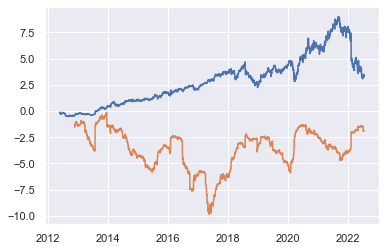

In [3]:
# fetch the daily returns for a stock
stock = qs.utils.download_returns('FB')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()
(stock+1).prod()-1
plt.plot(qs.stats.compsum(returns=stock))
plt.plot(qs.stats.momentum(returns=stock))
plt.plot(qs.stats.momentum_simple(returns=stock))
# stock.rolling(22).apply(qs.stats.momentum)
plt.show()

In [3]:
# tickerList = ['TFLO','EMBH','IBTA.L','IBTU.L','SHV','DFNM']
# tickerList = ['TFLO','IBTA.L','IBTU.L','SHV','USFR','PVI','OPER']
tickerList = ['VHT','VOO']

stocks = pd.DataFrame()
startDates = dict()
for i in tickerList:
    newStock = qs.utils.download_returns(i)
    stocks = pd.concat([stocks, newStock], axis=1)
    startDates[i]=newStock.index[0]

In [4]:
stocks.columns = tickerList
display(stocks.tail(3))
display(startDates)
display(startDates.keys())
maxStartDate = max(startDates.values())
display(maxStartDate)

,VHT,VOO
2022-07-08 00:00:00,0.003275,-0.000587
2022-07-11 00:00:00,-0.006033,-0.011307
2022-07-12 00:00:00,-0.012015,-0.009229


{'VHT': Timestamp('2004-01-30 00:00:00'),
 'VOO': Timestamp('2010-09-09 00:00:00')}

dict_keys(['VHT', 'VOO'])

Timestamp('2010-09-09 00:00:00')

In [5]:
print('utils')
print(vdir(qs.utils))
print('stats')
print(vdir(qs.stats))
print('plots')
print(vdir(qs.plots))
help(qs.stats.comp)
help(qs.utils.make_portfolio)

utils
['aggregate_returns', 'download_returns', 'exponential_stdev', 'group_returns', 'inspect', 'log_returns', 'make_index', 'make_portfolio', 'multi_shift', 'rebase', 'to_excess_returns', 'to_log_returns', 'to_prices', 'to_returns']
stats
['adjusted_sortino', 'autocorr_penalty', 'avg_loss', 'avg_return', 'avg_win', 'best', 'cagr', 'calmar', 'common_sense_ratio', 'comp', 'compare', 'compsum', 'conditional_value_at_risk', 'consecutive_losses', 'consecutive_wins', 'cpc_index', 'cvar', 'distribution', 'drawdown_details', 'expected_return', 'expected_shortfall', 'exposure', 'gain_to_pain_ratio', 'geometric_mean', 'ghpr', 'greeks', 'implied_volatility', 'information_ratio', 'kelly_criterion', 'kurtosis', 'max_drawdown', 'monthly_returns', 'omega', 'outlier_loss_ratio', 'outlier_win_ratio', 'outliers', 'payoff_ratio', 'pct_rank', 'probabilistic_adjusted_sortino_ratio', 'probabilistic_ratio', 'probabilistic_sharpe_ratio', 'probabilistic_sortino_ratio', 'profit_factor', 'profit_ratio', 'r2', 

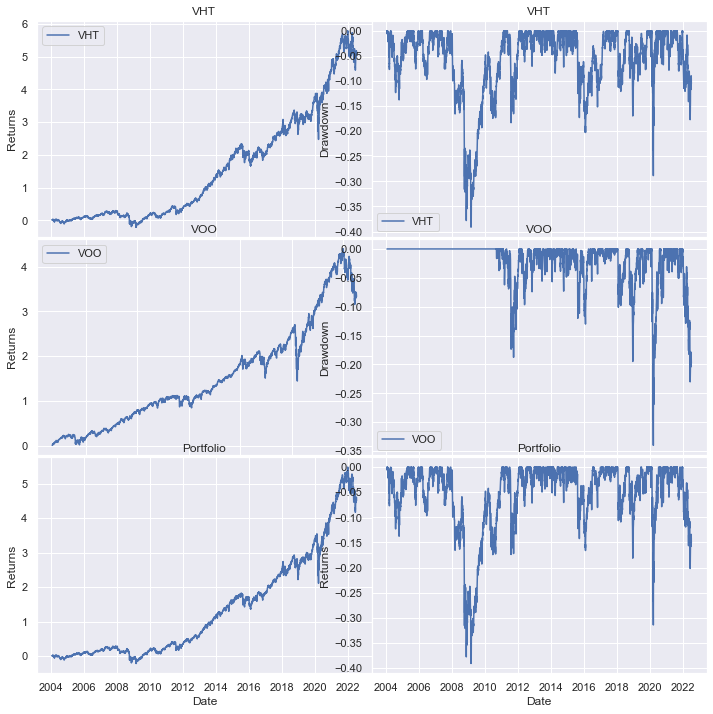

In [6]:
# portfolio = qs.utils.make_index(stocks)
n = stocks.shape[1]+1
# display(n)
portfolio = stocks.mean(axis=1)
fig, ax = plt.subplots(ncols=2, nrows=n,gridspec_kw = {'wspace':0, 'hspace':0.01}, figsize=(12,4*n))
fig.patch.set_facecolor('white')
for i, stock in enumerate(stocks.columns):
    ax[i,0].plot(qs.stats.compsum(stocks[stock]), label=stock)
    ax[i,0].legend()
    ax[i,0].set_title(stock)
    ax[i,0].set_xlabel('Date')
    ax[i,0].set_ylabel('Returns')
    ax[i,1].plot(qs.stats.to_drawdown_series(stocks[stock]), label=stock)
    ax[i,1].legend()
    ax[i,1].set_title(stock)
    ax[i,1].set_xlabel('Date')
    ax[i,1].set_ylabel('Drawdown')
    # ax[i].grid(visible=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[n-1,0].plot(qs.stats.compsum(portfolio), label='Portfolio')
ax[n-1,0].set_title('Portfolio')
ax[n-1,0].set_xlabel('Date')
ax[n-1,0].set_ylabel('Returns')
ax[n-1,1].plot(qs.stats.to_drawdown_series(portfolio), label='Portfolio')
ax[n-1,1].set_title('Portfolio')
ax[n-1,1].set_xlabel('Date')
ax[n-1,1].set_ylabel('Returns')
plt.show()
# qs.plots.snapshot(portfolio, title='Performance')

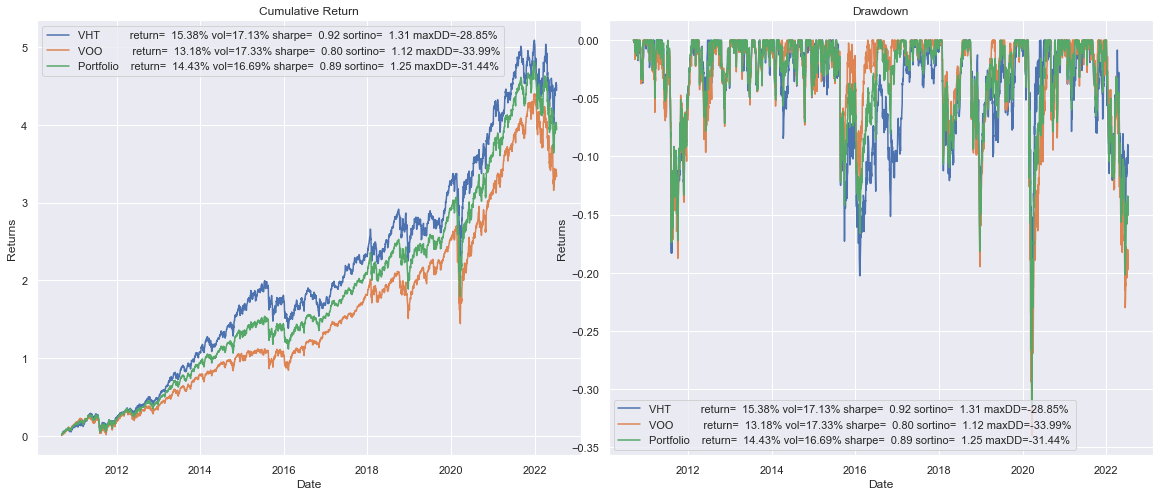

In [28]:
# portfolio = qs.utils.make_index(stocks)
n = stocks.shape[1]+1
# display(n)
labelFormat =  '{:12s} return={:8.2%} vol={:6.2%} sharpe={:6.2f} sortino={:6.2f} maxDD={:6.2%}'
portfolio = stocks.mean(axis=1)
fig, ax = plt.subplots(ncols=2, nrows=1,gridspec_kw = {'wspace':0.05, 'hspace':0.01}, figsize=(20,8))
fig.patch.set_facecolor('white')
for i, stock in enumerate(stocks.columns):
    relevantData = stocks[stock].loc[stocks[stock].index>=maxStartDate]
    relevantLabel = labelFormat.format(stock,qs.stats.cagr(relevantData),qs.stats.volatility(relevantData),qs.stats.sharpe(relevantData),qs.stats.sortino(relevantData),qs.stats.max_drawdown(relevantData))
    ax[0].plot(qs.stats.compsum(relevantData), label=relevantLabel)
    ax[0].set_title(stock)
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Percent Return')
    ax[1].plot(qs.stats.to_drawdown_series(relevantData), label=relevantLabel)
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Percentage Drawdown')
relevantData = portfolio.loc[portfolio.index>=maxStartDate]
relevantLabel = labelFormat.format('Portfolio',qs.stats.cagr(relevantData),qs.stats.volatility(relevantData),qs.stats.sharpe(relevantData),qs.stats.sortino(relevantData),qs.stats.max_drawdown(relevantData))
ax[0].plot(qs.stats.compsum(relevantData), label=relevantLabel)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Returns')
ax[0].legend()
ax[0].set_title('Cumulative Return')
ax[1].plot(qs.stats.to_drawdown_series(relevantData), label=relevantLabel)
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Returns')
ax[1].legend()
ax[1].set_title('Drawdown')
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2010-09-09
End Period                 2022-07-12
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          444.4%
CAGR﹪                     15.38%

Sharpe                     0.92
Prob. Sharpe Ratio         99.91%
Smart Sharpe               0.84
Sortino                    1.31
Smart Sortino              1.19
Sortino/√2                 0.92
Smart Sortino/√2           0.84
Omega                      1.18

Max Drawdown               -28.85%
Longest DD Days            681
Volatility (ann.)          17.13%
Calmar                     0.53
Skew                       -0.43
Kurtosis                   9.18

Expected Daily %           0.06%
Expected Monthly %         1.19%
Expected Yearly %          13.92%
Kelly Criterion            8.63%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.71%
Expected Shortfall (cVaR)  -1.71%

Max Consecutive Wins    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-06-08,109,-28.853954,-25.783645
2,2015-07-21,2016-02-11,2017-06-01,681,-20.257778,-18.760289
3,2011-05-19,2011-08-08,2012-02-01,258,-18.310698,-16.526906
4,2021-12-31,2022-06-16,2022-07-12,193,-17.705310,-17.262924
5,2018-10-02,2018-12-24,2019-11-08,402,-16.967400,-13.638316


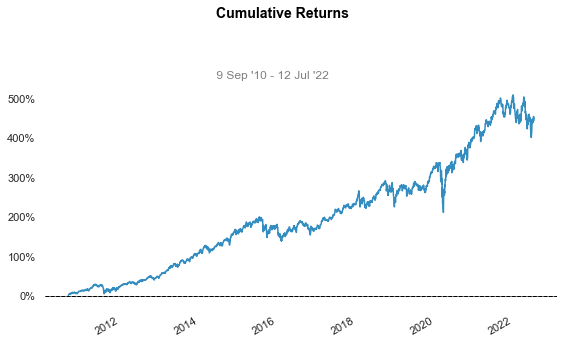

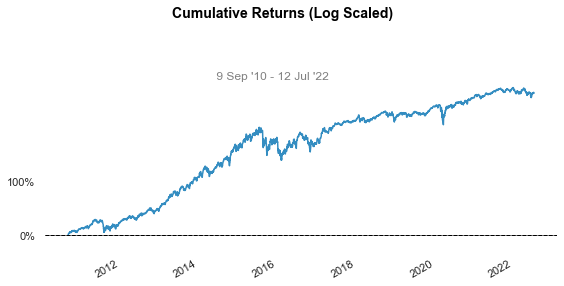

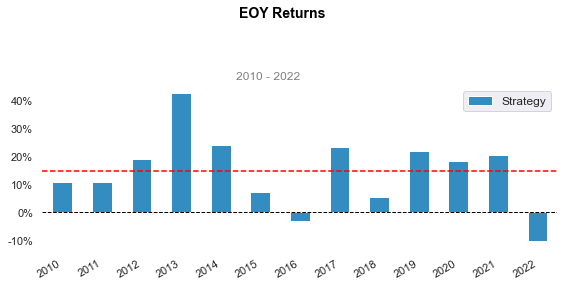

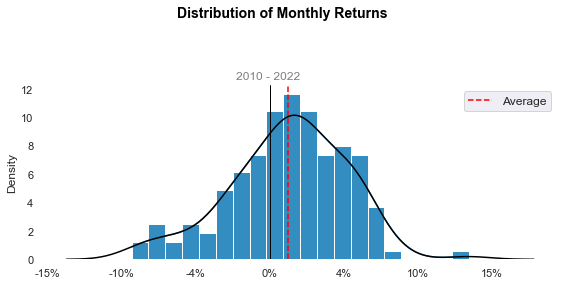

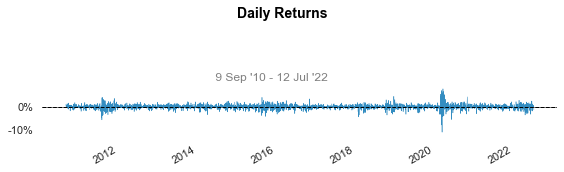

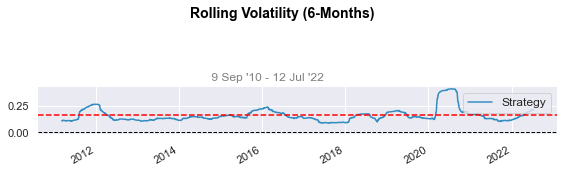

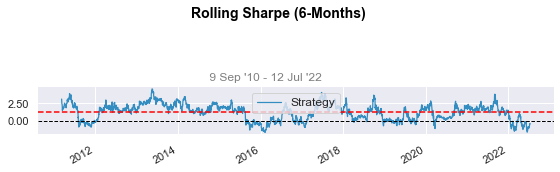

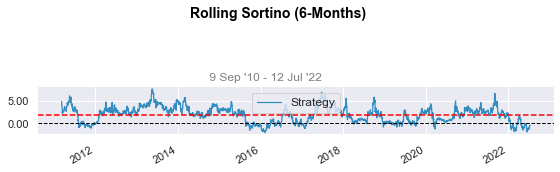

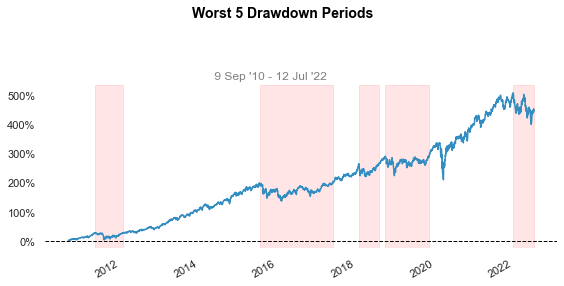

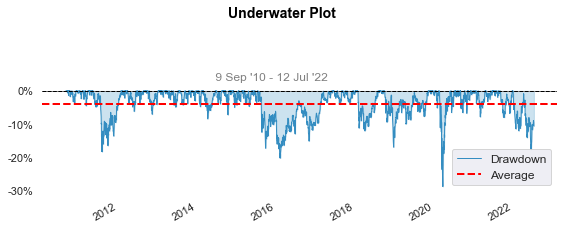

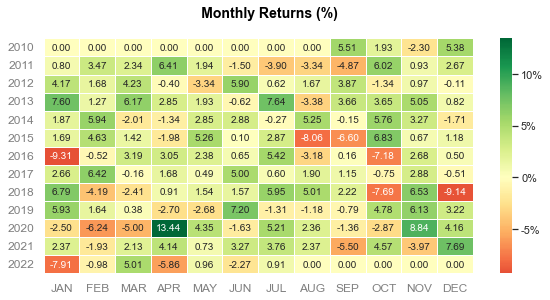

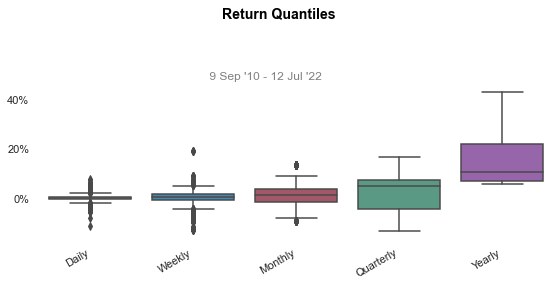

None

                           Strategy
-------------------------  ----------
Start Period               2010-09-09
End Period                 2022-07-12
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          333.44%
CAGR﹪                     13.18%

Sharpe                     0.8
Prob. Sharpe Ratio         99.66%
Smart Sharpe               0.7
Sortino                    1.12
Smart Sortino              0.97
Sortino/√2                 0.79
Smart Sortino/√2           0.69
Omega                      1.17

Max Drawdown               -33.99%
Longest DD Days            277
Volatility (ann.)          17.33%
Calmar                     0.39
Skew                       -0.59
Kurtosis                   14.53

Expected Daily %           0.05%
Expected Monthly %         1.03%
Expected Yearly %          11.94%
Kelly Criterion            7.97%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.74%
Expected Shortfall (cVaR)  -1.74%

Max Consecutive Wins    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-08-10,172,-33.993009,-29.372166
2,2022-01-04,2022-06-16,2022-07-12,189,-23.003930,-21.512297
3,2018-09-21,2018-12-24,2019-04-12,203,-19.476765,-15.946133
4,2011-05-02,2011-10-03,2012-02-03,277,-18.754576,-17.276202
5,2015-07-21,2016-02-11,2016-04-18,272,-13.000775,-11.869833


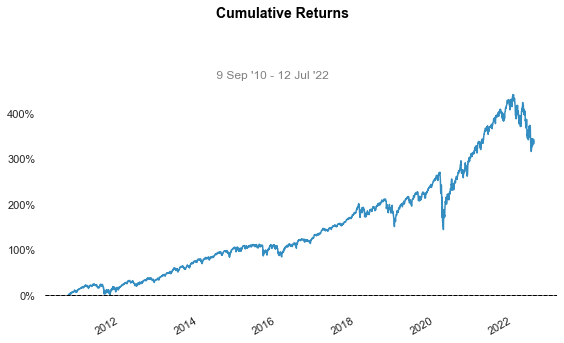

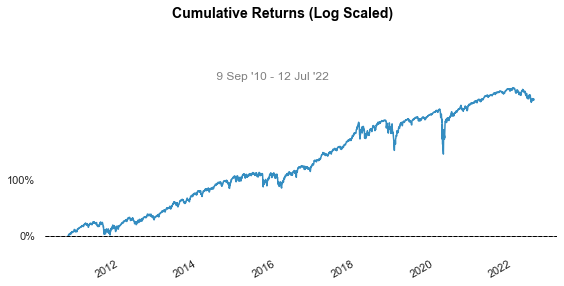

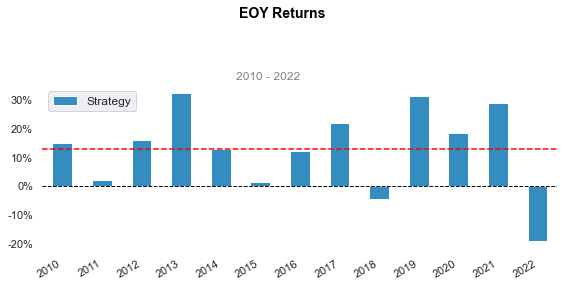

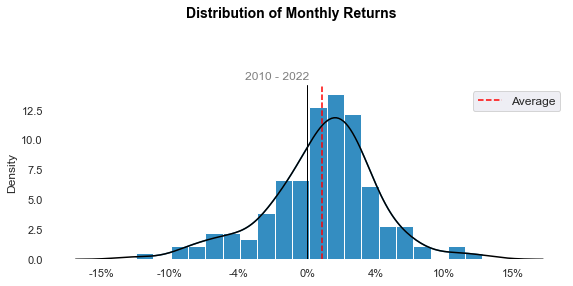

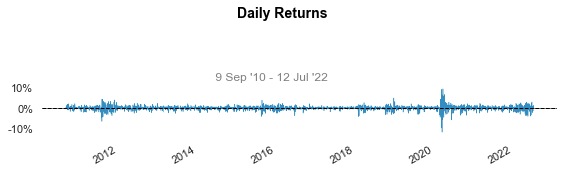

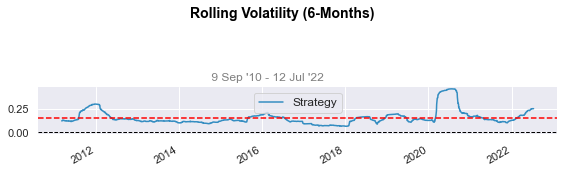

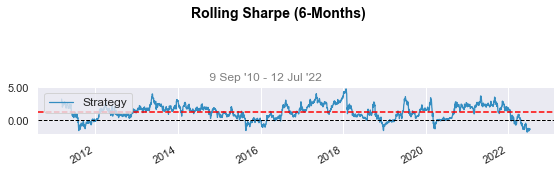

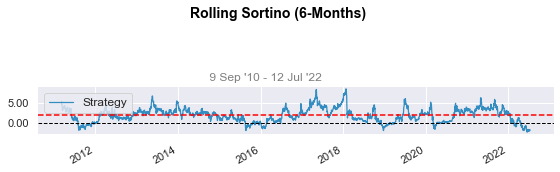

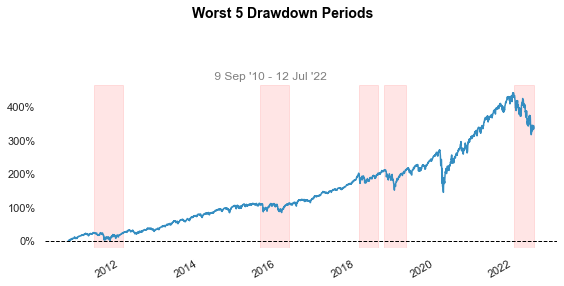

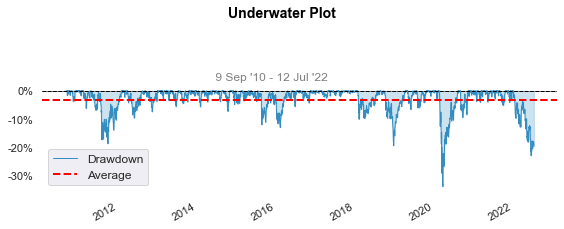

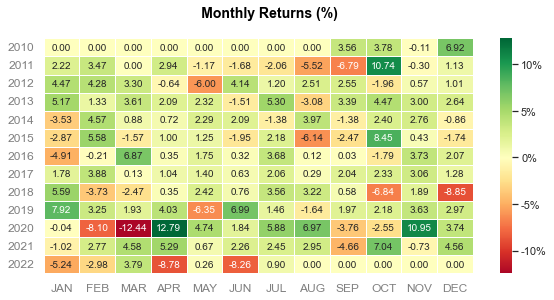

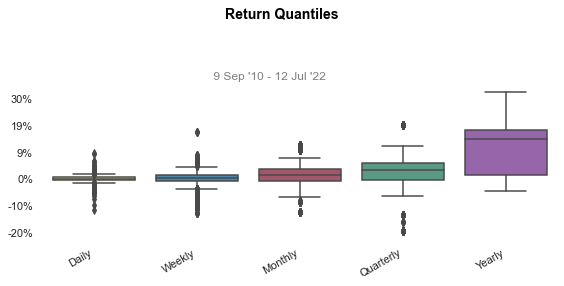

None

In [20]:
# additional detail
# qs.stats.compsum(stocks.loc[stocks.index>=maxStartDate])
# for stock in tickerList:
#     display(qs.reports.full(returns=stocks.loc[stocks[stock].index>=maxStartDate,stock]))

In [ ]:
# report = qs.reports.metrics(mode='full', returns=stock)

In [9]:
# qs.reports.plots(mode='full', returns=stock) # shows basic/full metrics

In [10]:
# qs.reports.basic(returns=stock) # shows basic metrics and plots

                           Strategy
-------------------------  ----------
Start Period               2004-01-30
End Period                 2022-07-12
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          507.33%
CAGR﹪                     10.27%

Sharpe                     0.65
Prob. Sharpe Ratio         99.73%
Smart Sharpe               0.6
Sortino                    0.92
Smart Sortino              0.85
Sortino/√2                 0.65
Smart Sortino/√2           0.6
Omega                      1.13

Max Drawdown               -39.12%
Longest DD Days            1178
Volatility (ann.)          17.31%
Calmar                     0.26
Skew                       -0.17
Kurtosis                   10.73

Expected Daily %           0.04%
Expected Monthly %         0.81%
Expected Yearly %          9.96%
Kelly Criterion            6.19%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.75%
Expected Shortfall (cVaR)  -1.75%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-12-11,2009-03-05,2011-03-03,1178,-39.121401,-35.816643
2,2020-02-20,2020-03-23,2020-06-08,109,-28.853954,-25.783645
3,2015-07-21,2016-02-11,2017-06-01,681,-20.257778,-18.760289
4,2011-05-19,2011-08-08,2012-02-01,258,-18.310698,-16.526906
5,2021-12-31,2022-06-16,2022-07-12,193,-17.705310,-17.262924


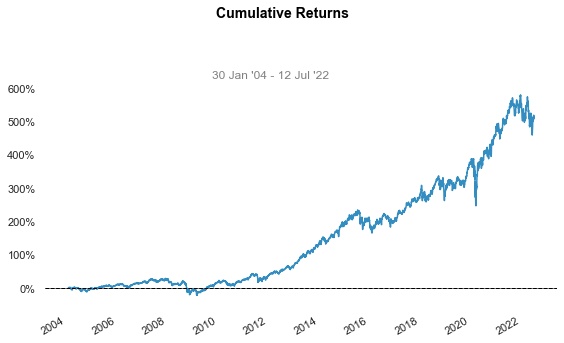

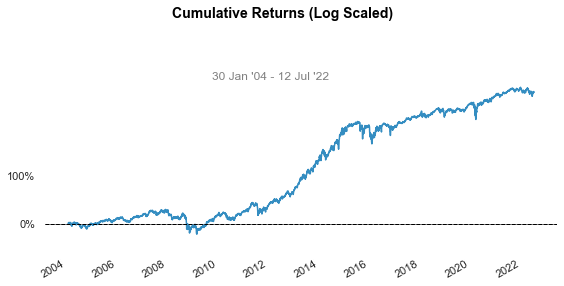

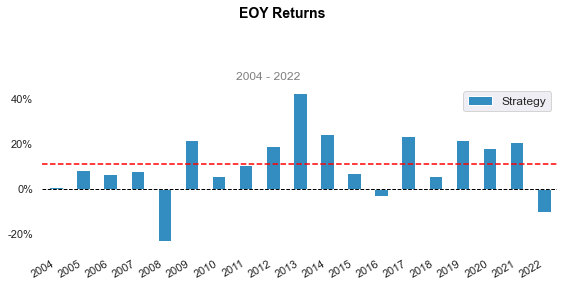

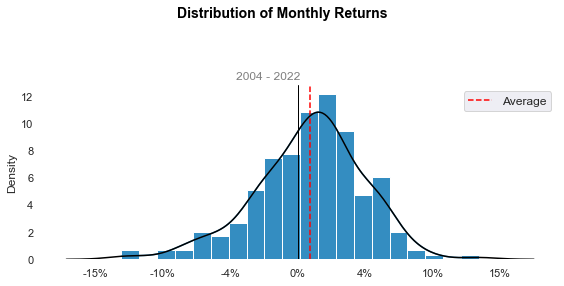

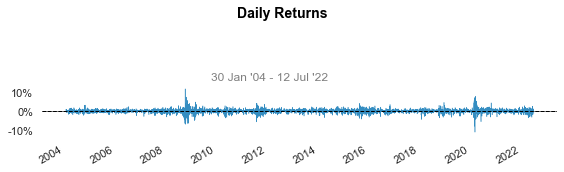

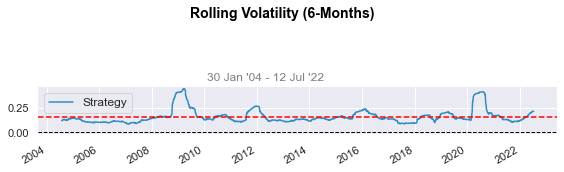

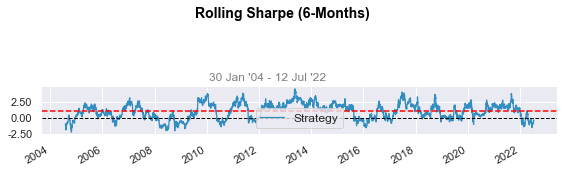

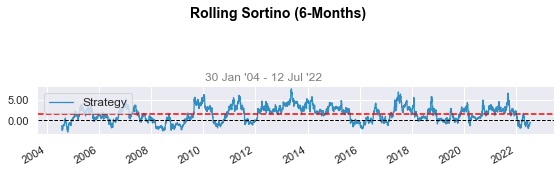

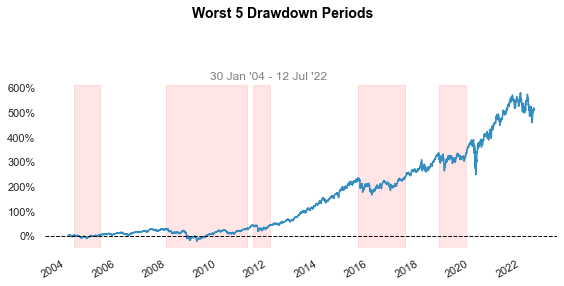

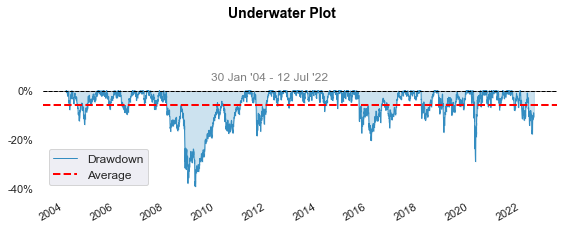

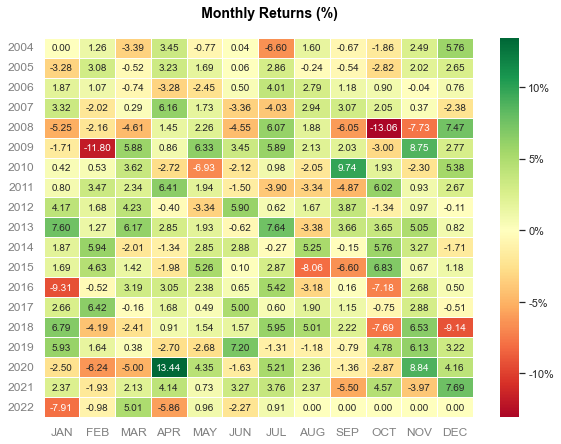

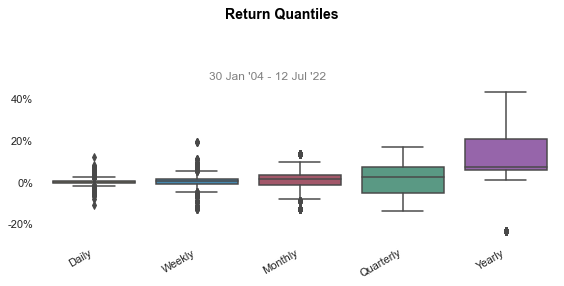

In [11]:
qs.reports.full(returns=stocks.iloc[:,0]) # shows full metrics and plots

In [12]:
# qs.reports.html(returns=stock) # generates a complete report as html